# Data Analysis with JSON Files

In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict

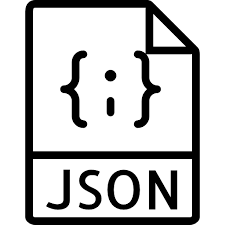

Part of being a good data scientist is having the capacity to work with data in many different forms. Much data online is stored in JSON format. So let's see if we can conduct a descriptive analysis of data when it's given to us in that form!

## What is JSON?

JSON stands for Java Script Object Notation. 

JSON objects are one common way that data is transmitted over the web.  It is notable for being lightweight, which makes it [preferred](https://stackoverflow.com/questions/383692/what-is-json-and-why-would-i-use-it), generally, over XML.

## JSON Format

JSON objects store data in a format similar to a nested Python dictionary. The JSON format makes it easy to store as a file, transfer between users, and use in other languages.

For more information about the syntax of JSON files, check out this [link](https://www.json.org/json-en.html) to the JSON website.

## Loading the JSON file

For this example, we've created a `new_releases.json` file containing data on 20 newly released music albums. We got this from the Spotify API - we'll explain what this means later. 

Let's begin by importing the `json` package, opening a file with python's `open()` function, and then loading that data from the JSON file into a new `data` object.

In [2]:
with open('data/new_releases.json') as f:
    data = json.load(f)

The Spotify API returned the data in the form of JSON object, which the `json` module transforms into a Python object.

## Exploring JSON Schemas  

Recall that JSON files have a nested structure. The deepest levels of our object will contain individual values: numbers, booleans or strings. These in turn will be stored in the equivalents of Python lists and dictionaries, usually with many levels of nesting. 

If you try to look at a raw JSON file, you will likely have a hard time understanding the structure. To more easily make sense of it, we will proceed through each level methodically.

In [3]:
## This will look messy
print(data)

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20', 'items': [{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'}, 'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i', 'id': '1RyvyyTE3xzB2ZywiAwp0i', 'name': 'Future', 'type': 'artist', 'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/4bNPOFOzxGhF5jhfIK6lit'}, 'href'

To start exploring, let's check the type of our new `data` object and start mapping out the hierarchy.

In [4]:
type(data)

dict

In [5]:
data.keys()

dict_keys(['albums'])

In this case, there is only a single key, 'albums', so we'll continue on down the pathway exploring and mapping out the hierarchy. Once again, let's start by checking the type of this nested data structure.

In [6]:
type(data['albums'])

dict

In [7]:
data['albums'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

At this point, things are starting to look something like this: 

![](img/json_diagram1.jpg)

If we were to continue checking individual data types, we'd have a lot to go through. To simplify this, let's use a `for` loop:

In [8]:
for key, value in data['albums'].items():
    print(key, type(value))

href <class 'str'>
items <class 'list'>
limit <class 'int'>
next <class 'str'>
offset <class 'int'>
previous <class 'NoneType'>
total <class 'int'>


Adding this to our diagram, we now have something like this:

![](img/json_diagram2.jpg)

Let's look at the `items` list - this contains the album information. 

In [9]:
type(data['albums']['items'])

list

In [10]:
data['albums']['items'][0]

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
   'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
   'id': '1RyvyyTE3xzB2ZywiAwp0i',
   'name': 'Future',
   'type': 'artist',
   'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'external_urls': 

We access values as we would for nested lists or dictionaries in Python.

In [11]:
data['albums']['items'][0].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [12]:
data['albums']['items'][0]['artists'][0]['name']

'Future'

In [13]:
data['albums']['items'][1]['artists'][0]['name']

'Kygo'

## Loading in Plant Data

Now that we have a handle on how to deal with data in JSON form, let's load in a new dataset and construct an analysis!

In [14]:
with open('data/plants.json', 'r') as f:
    plants = json.load(f)

This dataset was gathered with the [Trefle API](https://trefle.io). It contains information about 1000 plants in JSON form.

In [15]:
len(plants)

1000

## What Information Do We Have?

Let's take a look at the first plant in our list to see what information is available.

In [16]:
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

You can find more information about these fields [here](https://docs.trefle.io/docs/advanced/plants-fields).

## Plant Families

Let's start by seeing what botanical families are represented in our data. We'll build a dictionary that counts the plants by family. We'll use the common names for this purpose.

In [17]:
plant_dict = defaultdict(int)
for plant in plants:
    plant_dict[plant['family_common_name']] += 1

In [18]:
plant_dict['Beech family']

10

Are there any missing values?

In [19]:
plant_dict[None]

113

Let's remove these by using a dictionary comprehension:

In [22]:
fams_clean = {fam: num for fam, num in plant_dict.items() if fam != None}#{k:v for k,v in data.items() if fam!=None}
fams_clean

{'Beech family': 10,
 'Nettle family': 2,
 'Grass family': 81,
 'Plantain family': 25,
 'Buttercup family': 21,
 'Pea family': 63,
 'Olive family': 5,
 'Rose family': 49,
 'Birch family': 7,
 'Rush family': 19,
 'Buckwheat family': 17,
 'Soapberry family': 7,
 'Pine family': 10,
 'Mint family': 45,
 'Madder family': 9,
 'Pink family': 31,
 'Carrot family': 29,
 'Geranium family': 10,
 'Aster family': 80,
 'Horsetail family': 7,
 'Heath family': 17,
 'Loosestrife family': 2,
 'Bracken Fern family': 1,
 'Mustard family': 29,
 'Evening Primrose family': 10,
 'Willow family': 3,
 'Polypody family': 7,
 'Dogwood family': 3,
 'Honeysuckle family': 9,
 'Morning-glory family': 3,
 'Iris family': 1,
 'Spleenwort family': 8,
 'Amaranth family': 6,
 'Sedge family': 41,
 'Buckthorn family': 3,
 'Holly family': 1,
 'Potato family': 7,
 'Bellflower family': 9,
 'Wood-Sorrel family': 3,
 'Borage family': 13,
 'Bittersweet family': 2,
 'Primrose family': 12,
 'Poppy family': 7,
 'Spurge family': 10,
 

Let's also remove the families whose counts are less than ten:

In [23]:
fams_clean = {fam: num for fam, num in fams_clean.items() if num >= 10}
fams_clean

{'Beech family': 10,
 'Grass family': 81,
 'Plantain family': 25,
 'Buttercup family': 21,
 'Pea family': 63,
 'Rose family': 49,
 'Rush family': 19,
 'Buckwheat family': 17,
 'Pine family': 10,
 'Mint family': 45,
 'Pink family': 31,
 'Carrot family': 29,
 'Geranium family': 10,
 'Aster family': 80,
 'Heath family': 17,
 'Mustard family': 29,
 'Evening Primrose family': 10,
 'Sedge family': 41,
 'Borage family': 13,
 'Primrose family': 12,
 'Spurge family': 10,
 'Broom-rape family': 10,
 'Tape-grass family': 10}

Now we can make a bar chart of the numbers:

In [24]:

plt.style.use('seaborn')

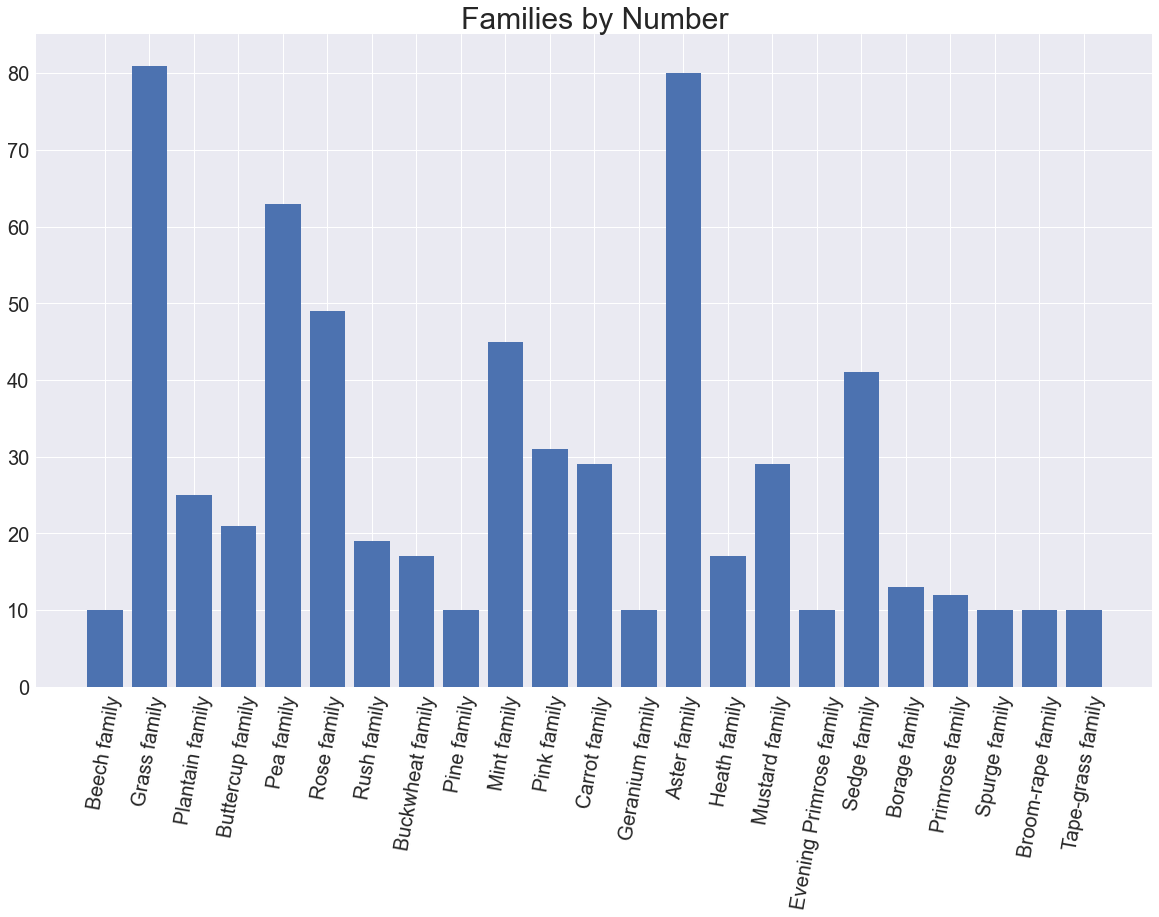

In [27]:
fig, ax = plt.subplots(figsize=(20, 12))

ax.bar(list(fams_clean.keys()), list(fams_clean.values()))
ax.set_title('Families by Number', fontsize=30)
plt.xticks(rotation=80, fontsize=20)
plt.yticks(fontsize=20);

## Synonyms

Suppose we wanted to know how many synonymous names were listed for each plant. We could grab this number with a list comprehension:

In [29]:
num_syn = [len(plant['synonyms']) for plant in plants]
num_syn

[16,
 6,
 31,
 37,
 121,
 192,
 20,
 17,
 4,
 62,
 29,
 36,
 43,
 14,
 13,
 15,
 32,
 8,
 18,
 12,
 43,
 78,
 28,
 41,
 81,
 23,
 15,
 24,
 16,
 72,
 8,
 16,
 30,
 65,
 47,
 11,
 46,
 4,
 178,
 41,
 71,
 39,
 7,
 24,
 14,
 6,
 9,
 41,
 32,
 6,
 40,
 14,
 76,
 37,
 23,
 6,
 37,
 129,
 28,
 40,
 31,
 64,
 20,
 26,
 15,
 25,
 21,
 9,
 6,
 33,
 17,
 20,
 10,
 17,
 17,
 38,
 49,
 21,
 11,
 41,
 22,
 28,
 34,
 21,
 11,
 22,
 24,
 85,
 14,
 12,
 10,
 12,
 0,
 54,
 6,
 74,
 18,
 29,
 21,
 8,
 15,
 30,
 38,
 57,
 9,
 68,
 38,
 69,
 13,
 128,
 56,
 12,
 13,
 10,
 39,
 151,
 25,
 54,
 19,
 14,
 13,
 48,
 12,
 31,
 33,
 11,
 67,
 36,
 7,
 47,
 13,
 29,
 12,
 5,
 26,
 21,
 17,
 10,
 22,
 42,
 66,
 63,
 19,
 29,
 97,
 49,
 28,
 14,
 17,
 15,
 48,
 13,
 15,
 27,
 20,
 49,
 8,
 9,
 14,
 8,
 3,
 13,
 6,
 41,
 42,
 27,
 26,
 14,
 17,
 23,
 14,
 24,
 25,
 2,
 7,
 19,
 40,
 13,
 73,
 17,
 44,
 16,
 5,
 12,
 11,
 35,
 79,
 5,
 29,
 10,
 6,
 19,
 14,
 28,
 21,
 32,
 16,
 28,
 4,
 10,
 40,
 6,
 9,
 15,
 6,
 

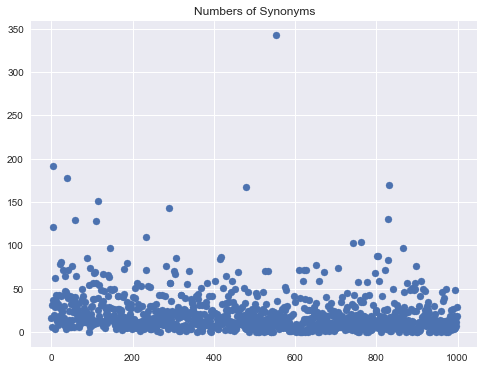

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(range(1000), num_syn)
ax.set_title('Numbers of Synonyms');

### Exercise

There's an outlier here. Find the plant with almost 350 synonyms!

In [36]:
[plant for plant in plants if len(plant['synonyms'])>300]

[{'id': 182597,
  'common_name': 'Irish potato',
  'slug': 'solanum-tuberosum',
  'scientific_name': 'Solanum tuberosum',
  'year': 1753,
  'bibliography': 'Sp. Pl.: 185 (1753)',
  'author': 'L.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Potato family',
  'genus_id': 4329,
  'image_url': 'https://bs.plantnet.org/image/o/95a0197b33f8efe2ea7a0d25f84476415779a4b5',
  'synonyms': ['Solanum tuberosum subsp. andigenum',
   'Solanum tuberosum f. chiar-pala',
   'Solanum tuberosum var. strobilinum',
   'Solanum tuberosum var. murukewillu',
   'Solanum stenotomum var. peruanum',
   'Larnax sylvarum subsp. novogranatensis',
   'Solanum andigenum f. tiahuanacense',
   'Solanum andigenum f. pallidum',
   'Solanum tuberosum var. batatinum',
   'Solanum tuberosum var. rugiorum',
   'Solanum andigenum f. ovatibaccatum',
   'Solanum tuberosum f. contortum',
   'Solanum andigenum f. llutuc-runtum',
   'Solanum andigenum var. mexicanum',
   'Solanum tuberosum var. album',
  

<details>
<summary>One of many possible answers here - No peeking!
    </summary>
    <code>[plant for plant in plants if len(plant['synonyms']) > 300]</code>
    </details>

## Bibliography

In [37]:
biblios = [plant['bibliography'] for plant in plants]

In [38]:
biblios[0]

'Encycl. 1: 723 (1785)'

Let's check the bibliographies for any explicit mention of Linnaeus, the godfather of biological taxonomy. First we'll remove the plants with no bibliography:

In [39]:
hasbiblio = [plant['bibliography'] for plant in plants if plant['bibliography'] != None]

In [40]:
len(hasbiblio)

994

In [41]:
linnaeans = [biblio for biblio in hasbiblio if 'Linnaeus' in biblio]
linnaeans

['Linnaeus, C. (1753). Species plantarum, exhibentes plantas rite cognitas ad genera relatas cum differentiis specificis, nominibus trivialibus, synonymis selectis, locis natalibus, secundum systema sexuale digestas. Stockholm.']

### Exercise

What plant is this?

In [49]:
[plant for plant in plants if plant['bibliography'] == linnaeans[0]]

[{'id': 170295,
  'common_name': 'Little hogweed',
  'slug': 'portulaca-oleracea',
  'scientific_name': 'Portulaca oleracea',
  'year': 1753,
  'bibliography': 'Linnaeus, C. (1753). Species plantarum, exhibentes plantas rite cognitas ad genera relatas cum differentiis specificis, nominibus trivialibus, synonymis selectis, locis natalibus, secundum systema sexuale digestas. Stockholm.',
  'author': 'L.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Purslane family',
  'genus_id': 5580,
  'image_url': 'https://bs.plantnet.org/image/o/5defe82d91173cf9450c2f4bc7b673ccd715003e',
  'synonyms': ['Portulaca neglecta',
   'Portulaca retusa',
   'Portulaca parvifolia',
   'Portulaca suffruticosa',
   'Portulaca trianthemoides',
   'Portulaca poellnitziana',
   'Portulaca fosbergii',
   'Portulaca latifolia',
   'Portulaca olitoria',
   'Portulaca maritima',
   'Portulaca papillosa',
   'Portulaca dichotoma',
   'Portulaca pilosa var. marginata',
   'Portulaca stellata',


<details>
    <summary>
        Answer
    </summary>
<code>[plant for plant in plants if plant['bibliography'] == linnaeans[0]]</code>
    </details>

## Matching Author and Bibliography

In fact, _Species Plantarum_ (1753) was written by Linnaeus, and "Sp. Pl." in these bibliographies is a reference to that master work. Let's check to see who the author is for these records whose bibliographies start with "Sp. Pl.":

In [52]:
sps = []
for plant in plants:
    try:#tests the code for errors(if none startswith'' then an error results)
        if plant['bibliography'].startswith('Sp. Pl.'):
            sps.append(plant)
    except:# allows one to handle the error
        continue

The try and except blocks in Python are used for exception handling, allowing a program to gracefully handle errors that would otherwise cause it to crash. The try block encloses the code that might raise an exception, and the except block specifies how to handle the exception if it occurs.
Here's an example:

try:

        numerator = 10

        denominator = 0

        result = numerator / denominator

        print(result)

except ZeroDivisionError:

        print("Error: Cannot divide by zero.")
    

    

In this example, the code attempts to divide 10 by 0, which will raise a ZeroDivisionError. The try block catches this exception, and the except block is executed, printing the error message "Error: Cannot divide by zero." If the division had been successful, the except block would have been skipped.

In [53]:
sp_authors = [sp['author'] for sp in sps]

In [57]:
uniq_auth = list(set(sp_authors))

In [55]:
counts = []
for author in uniq_auth:
    counts.append(sp_authors.count(author))

In [56]:
dict(zip(uniq_auth, counts))

{'L.': 439,
 None: 1,
 'A.Haines (Linnaeus)': 1,
 '(L.) L.': 2,
 '(J.Presl & C.Presl) Parl.': 1,
 'Willd.': 1}

### Exercise

Change the author to 'L.' (for 'Linnaeus') for all of these records.

In [61]:
for plant in plants:
    try:
        if plant['bibliography'].startswith('Sp.Pl.'):
            plant['author']=='L.'
    except:
        continue

<details>
    <summary>
        Answer
    </summary>
<code>for plant in plants:
    try:
        if plant['bibliography'].startswith('Sp. Pl.'):
            plant['author'] == 'L.'
    except:
        continue</code>
    </details>

## Bringing in `pandas`: Back to Synonyms

Let's take advantage of the DataFrame tools from `pandas`:

In [62]:
plants_df = pd.DataFrame(plants)

In [63]:
plants_df.head()

,id,common_name,slug,scientific_name,year,bibliography,author,status,rank,family_common_name,genus_id,image_url,synonyms,genus,family,links
0,678281,Evergreen oak,quercus-rotundifolia,Quercus rotundifolia,1785.0,Encycl. 1: 723 (1785),Lam.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/1a03948baf0300...,"[Quercus lyauteyi, Quercus rotundifolia f. cra...",Quercus,Fagaceae,{'self': '/api/v1/species/quercus-rotundifolia...
1,190500,Stinging nettle,urtica-dioica,Urtica dioica,1753.0,Sp. Pl.: 984 (1753),L.,accepted,species,Nettle family,1028,https://bs.plantnet.org/image/o/85256a1c2c098e...,"[Urtica major, Urtica tibetica, Urtica sicula,...",Urtica,Urticaceae,"{'self': '/api/v1/species/urtica-dioica', 'pla..."
2,126957,Orchardgrass,dactylis-glomerata,Dactylis glomerata,1753.0,Sp. Pl.: 71 (1753),L.,accepted,species,Grass family,2284,https://bs.plantnet.org/image/o/428f40dadfa028...,"[Koeleria dactylis, Festuca glomerata, Trachyp...",Dactylis,Poaceae,"{'self': '/api/v1/species/dactylis-glomerata',..."
3,167888,Narrowleaf plantain,plantago-lanceolata,Plantago lanceolata,1753.0,Sp. Pl.: 113 (1753),L.,accepted,species,Plantain family,5418,https://bs.plantnet.org/image/o/78a8374f009e6e...,"[Plantago lanceolata var. sphaerostachya, Plan...",Plantago,Plantaginaceae,{'self': '/api/v1/species/plantago-lanceolata'...
4,173327,English oak,quercus-robur,Quercus robur,1753.0,Sp. Pl.: 996 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/2292b670683abd...,"[Quercus longaeva, Quercus salicifolia, Quercu...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-robur', 'pla..."


### Exercises

1. Add the number of synonyms as a new column called "num_syn".
2. Sort the DataFrame by number of synonyms in descending order.
3. Grab the Image URL of the plant that has the fourth-highest number of synonyms.
4. Paste it into your browser and take a look!

In [74]:
#Add the number of synonyms as a new column called "num_syn".
plants_df['num_syn']=plants_df['synonyms'].map(len)

In [76]:
#Sort the DataFrame by number of synonyms in descending order.
sorted=plants_df.sort_values('num_syn',ascending=False)

In [78]:
#Grab the Image URL of the plant that has the fourth-highest number of synonyms.
sorted.loc[3, 'image_url']

'https://bs.plantnet.org/image/o/78a8374f009e6ed2dc71ca17d18e4271ea0a2a7b'

<details>
    <summary>Answer here
    </summary>
    <code>plants_df['num_syn'] = plants_df['synonyms'].map(len)
sorted = plants_df.sort_values('num_syn', ascending=False)
sorted.loc[3, 'image_url']</code>
    </details>

## Year

The year is an indication of when a valid name for the plant first appeared in print. Let's build a simple histogram of these years:

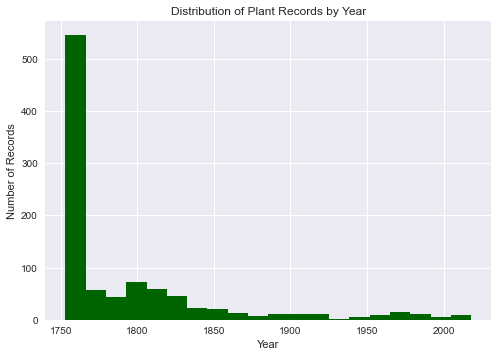

In [73]:
#fig, ax = plt.subplots()

#ax.hist(plants_df[plants_df['year'] > 0]['year'], color='darkgreen');

# Filter the DataFrame for valid years
valid_years = plants_df[plants_df['year'] > 0]['year']

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the histogram with specified number of bins and color
ax.hist(valid_years, bins=20, color='darkgreen')

# Set the title and labels
ax.set_title('Distribution of Plant Records by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Records')

# Display the plot
plt.show()

This current code effectively creates a histogram of the 'year' data from plants_df where the year is greater than 0, using a dark green color for the bars.

### Exercise

How many plants have first been written about just in the last 20 years? Make a bar chart or pie chart that shows the distribution by family of these plants.

<details>
    <summary>
        One answer here
    </summary>
<code>recent = plants_df[plants_df['year'] >= 2001]
fig, ax = plt.subplots(1, 2, figsize=(14, 6)
ax[0].bar(recent['family_common_name'].value_counts().index,
       recent['family_common_name'].value_counts(),
      color='darkgreen')
ax[1].pie(recent['family_common_name'].value_counts(),
      labels=recent['family_common_name'].value_counts().index,
      radius=1.2, labeldistance=0.4, rotatelabels=True);</code>
    </details>

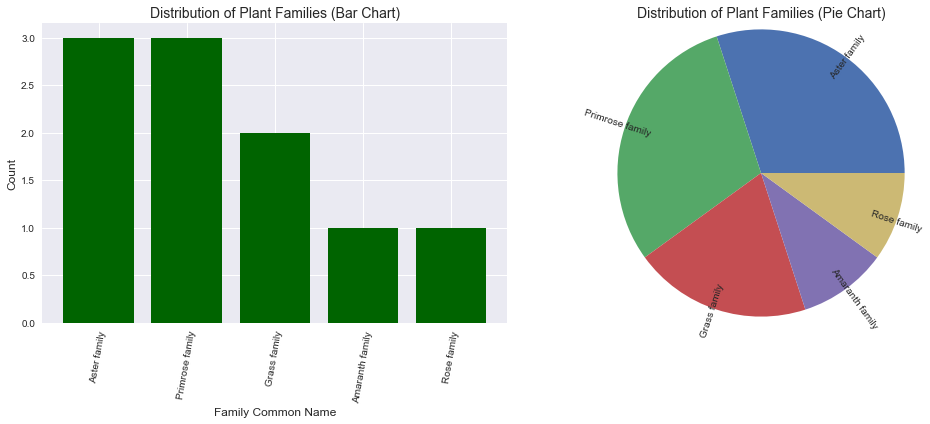

In [79]:
# Filter the DataFrame for records from the year 2005 onwards
recent = plants_df[plants_df['year'] >= 2005]

# Calculate the counts of each family common name
family_counts = recent['family_common_name'].value_counts()

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart ax[0]
ax[0].bar(family_counts.index, family_counts.values, color='darkgreen')
ax[0].set_title('Distribution of Plant Families (Bar Chart)', fontsize=14)
ax[0].set_xlabel('Family Common Name', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].tick_params(axis='x', rotation=80)  # Rotate x-axis labels by 80 degrees# Also plt.xticks(rotation=80)

# Pie chart
ax[1].pie(family_counts.values,
          labels=family_counts.index,
          radius=1.2,
          labeldistance=0.8,  # Adjusted for better label placement
          rotatelabels=True,
          textprops={'fontsize': 10})  # Adjust font size for readability
ax[1].set_title('Distribution of Plant Families (Pie Chart)', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()